<a href="https://colab.research.google.com/github/SlowikJakub/AI-Homework/blob/Homework0/Homework0Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import torchvision

from torchvision import models
from torchvision import transforms

resnet=models.resnet101(pretrained=True)

preprocess=transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize(
                                   mean=[0.485,0.456,.406],
                                   std=[0.229,0.224,0.225]
                               )

])


This is simple implementation following along with the powerpoint and the book says. The mean and std are the distributions created throughout the images

In [ ]:
from PIL import Image

img1=Image.open("/content/drive/MyDrive/AI images/447px-Gutenberg_Bible,_Lenox_Copy,_New_York_Public_Library,_2009._Pic_01.jpg")
img2=Image.open("/content/drive/MyDrive/AI images/_111434467_gettyimages-1143489763.jpg")
img3=Image.open("/content/drive/MyDrive/AI images/images.jpg")
img4=Image.open("/content/drive/MyDrive/AI images/index.jpg")
img5=Image.open("/content/drive/MyDrive/AI images/istockphoto-466175630-612x612.jpg")


We use a library to import the images here, they are saved to my google drive and I import them from here

In [ ]:
train_img1=preprocess(img1)
train_img2=preprocess(img2)
train_img3=preprocess(img3)
train_img4=preprocess(img4)
train_img5=preprocess(img5)

batch_trained1=torch.unsqueeze(train_img1,0)
batch_trained2=torch.unsqueeze(train_img2,0)
batch_trained3=torch.unsqueeze(train_img3,0)
batch_trained4=torch.unsqueeze(train_img4,0)
batch_trained5=torch.unsqueeze(train_img5,0)

I take the image, preprocess it so that it can be configured to a matrix that the computer will have an easier time evaluating, then the unsqueeze adds another tensor with a size of 1. 

In [ ]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
out1=resnet(batch_trained1)
out2=resnet(batch_trained2)
out3=resnet(batch_trained3)
out4=resnet(batch_trained4)
out5=resnet(batch_trained5)



with open('/content/drive/MyDrive/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

_, index1=torch.max(out1,1)
_, index2=torch.max(out2,1)
_, index3=torch.max(out3,1)
_, index4=torch.max(out4,1)
_, index5=torch.max(out5,1)

This portion runs the trained images through resnet101 which has been pretrained in my case. The it takes all of the labels that I also imported from the book, and reads it through. After reading it, the code will then find the maximum of all of the image classes or the maximum positions, then it will be saved to the initial position.

In [ ]:
percentage1 = torch.nn.functional.softmax(out1, dim=1)[0] * 100
labels[index1[0]], percentage1[index1[0]].item()


('lampshade, lamp shade', 15.33354377746582)

In [ ]:
_, indices1 = torch.sort(out1, descending=True)
[(labels[idx], percentage1[idx].item()) for idx in indices1[0][:5]]

[('lampshade, lamp shade', 15.33354377746582),
 ('table lamp', 11.10204792022705),
 ('book jacket, dust cover, dust jacket, dust wrapper', 9.851171493530273),
 ('quill, quill pen', 9.736624717712402),
 ('perfume, essence', 5.127641677856445)]

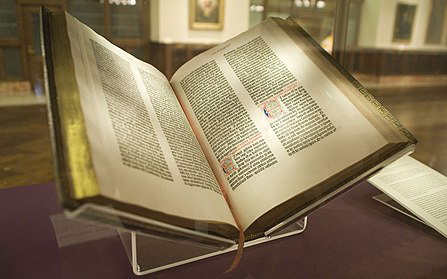

In [ ]:
img1

This image was incorrectly identified,  this is a bible that should have been identified as a book. Instead this was identified as a lampshade, this is due to the resizing of the image and croping within the center. I think it was also due to the models it was trained on, where there was not enough information for this model could possibly identify the inside of the bible.

In [ ]:
percentage2 = torch.nn.functional.softmax(out2, dim=1)[0] * 100
labels[index2[0]], percentage2[index2[0]].item()


('tabby, tabby cat', 74.33120727539062)

In [ ]:
_, indices2 = torch.sort(out2, descending=True)
[(labels[idx], percentage2[idx].item()) for idx in indices2[0][:5]]

[('tabby, tabby cat', 74.33120727539062),
 ('tiger cat', 15.29836654663086),
 ('Egyptian cat', 10.015237808227539),
 ('tiger, Panthera tigris', 0.07684619724750519),
 ('lynx, catamount', 0.07589804381132126)]

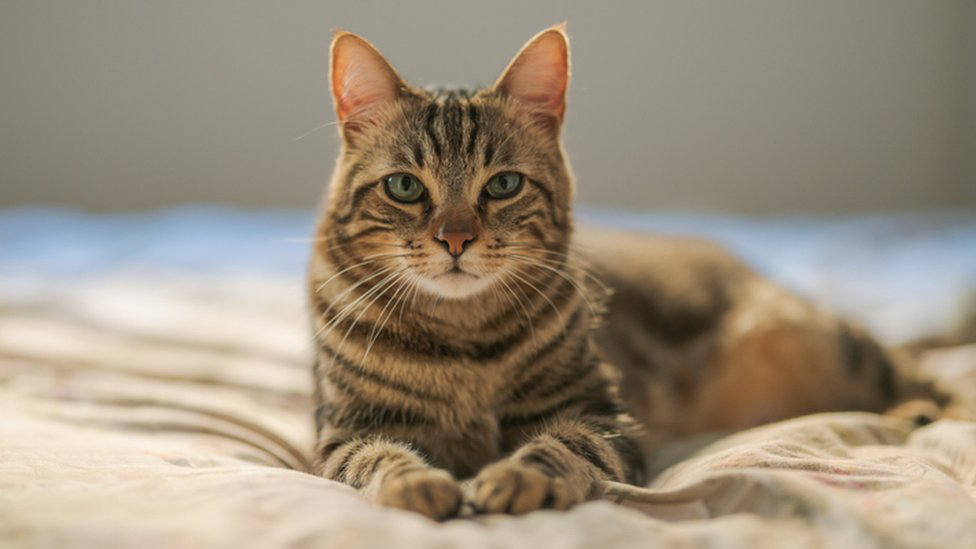

In [ ]:
img2

This image was correctly identified, although I am not entirely sure what kind of cat it is, but this has been correctly identified. And the Top 5 classifications for this imagery is also close, considering that all of these felines are predators and come from the same heritage, I can see how the computer manages to classify them.

In [ ]:
percentage3 = torch.nn.functional.softmax(out3, dim=1)[0] * 100
labels[index3[0]], percentage3[index3[0]].item()


('porcupine, hedgehog', 98.64519500732422)

In [ ]:
_, indices3 = torch.sort(out3, descending=True)
[(labels[idx], percentage3[idx].item()) for idx in indices3[0][:5]]

[('porcupine, hedgehog', 98.64519500732422),
 ('meerkat, mierkat', 0.8691438436508179),
 ('fox squirrel, eastern fox squirrel, Sciurus niger', 0.20217576622962952),
 ('black-footed ferret, ferret, Mustela nigripes', 0.06892947107553482),
 ('badger', 0.03552417457103729)]

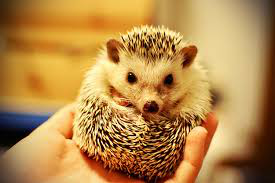

In [ ]:
img3

This image was properly identified to the 98th percent. This is a hedgehog in someones hand and it was accurately identified. The top 5 of this classification starts becoming less and less accurate, but this is again due to training images, all the top5 classifications are small animals that could have dark eyes and similar facial structures.

In [ ]:
percentage4 = torch.nn.functional.softmax(out4, dim=1)[0] * 100
labels[index4[0]], percentage4[index4[0]].item()


('jay', 62.65011978149414)

In [ ]:
_, indices4 = torch.sort(out4, descending=True)
[(labels[idx], percentage4[idx].item()) for idx in indices4[0][:5]]

[('jay', 62.65011978149414),
 ('brambling, Fringilla montifringilla', 8.727750778198242),
 ('bee eater', 6.320659160614014),
 ('indigo bunting, indigo finch, indigo bird, Passerina cyanea',
  3.605818748474121),
 ('goldfinch, Carduelis carduelis', 3.1714916229248047)]

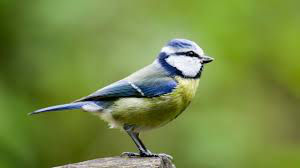

In [ ]:
img4

This image was properly identified, I am not a professional bird identifier but this seems to look like a blue jay which was reported with a 62% accuracy which is not good considering that it got the classification right. The top5 are all birds which is very good.

In [ ]:
percentage5 = torch.nn.functional.softmax(out5, dim=1)[0] * 100
labels[index5[0]], percentage5[index5[0]].item()


('strawberry', 73.26636505126953)

In [ ]:
_, indices5 = torch.sort(out5, descending=True)
[(labels[idx], percentage5[idx].item()) for idx in indices5[0][:5]]

[('strawberry', 73.26636505126953),
 ('bell pepper', 9.53797721862793),
 ('hip, rose hip, rosehip', 5.691074848175049),
 ('pot, flowerpot', 2.378718376159668),
 ('cucumber, cuke', 1.2634613513946533)]

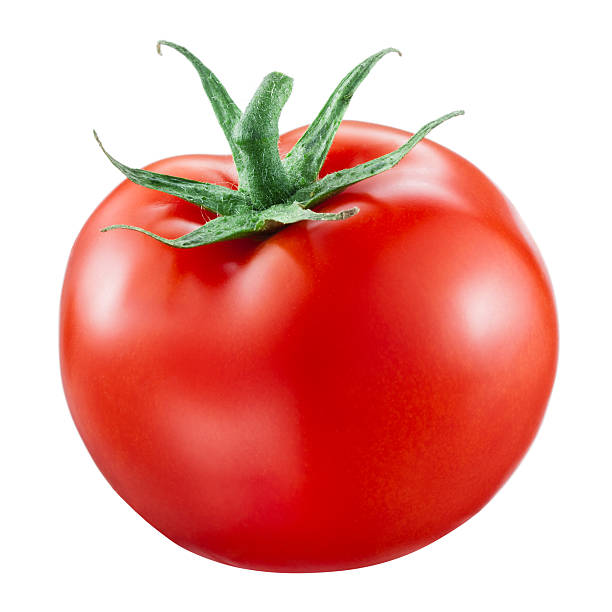

In [ ]:
img5

This image is wrong. The tomato was misclasified as a strawberry with a 73% accuracy. This is likely due to how it was resized and cropped, where both items are red, and have a green stem, but strawberries have seeds on the outside. The Top5 shockingly also did not have tomatoes within it which is a little weird and concerning. 